In [1]:
import pandas as pd

Azure_js_metrics = "Azure-js-metrics.xlsx"
Azure_java_metrics = "Azure-java-metrics.xlsx"
Azure_go_metrics = "Azure-go-metrics.xlsx"


xls = pd.read_excel(Azure_js_metrics, sheet_name=['Somma Requests per DDI-first-ar', 'Media Response Time per DDI-fir', 'Min Response Time per DDI-first', 'Max Response Time per DDI-first'])
df_js_1 = xls['Somma Requests per DDI-first-ar']
df_js_3 = xls['Media Response Time per DDI-fir']
df_js_2 = xls['Min Response Time per DDI-first']
df_js_4 = xls['Max Response Time per DDI-first']
df_js_1.drop(df_js_1.index[:10], inplace=True)
df_js_2.drop(df_js_2.index[:10], inplace=True)
df_js_3.drop(df_js_3.index[:10], inplace=True)
df_js_4.drop(df_js_4.index[:10], inplace=True)


xls = pd.read_excel(Azure_java_metrics, sheet_name=['Somma Requests per DDI-first-ar', 'Media Response Time per DDI-fir', 'Min Response Time per DDI-first', 'Max Response Time per DDI-first'])
df_java_1 = xls['Somma Requests per DDI-first-ar']
df_java_3 = xls['Media Response Time per DDI-fir']
df_java_2 = xls['Min Response Time per DDI-first']
df_java_4 = xls['Max Response Time per DDI-first']
df_java_1.drop(df_java_1.index[:10], inplace=True)
df_java_2.drop(df_java_2.index[:10], inplace=True)
df_java_3.drop(df_java_3.index[:10], inplace=True)
df_java_4.drop(df_java_4.index[:10], inplace=True)


xls = pd.read_excel(Azure_go_metrics, sheet_name=['Sum Requests for DDI-first-arch', 'Min Response Time for DDI-first', 'Avg Response Time for DDI-first', 'Max Response Time for DDI-first'])
df_go_1 = xls['Sum Requests for DDI-first-arch']
df_go_2 = xls['Min Response Time for DDI-first']
df_go_3 = xls['Avg Response Time for DDI-first']
df_go_4 = xls['Max Response Time for DDI-first']
df_go_1.drop(df_go_1.index[:10], inplace=True)
df_go_2.drop(df_go_2.index[:10], inplace=True)
df_go_3.drop(df_go_3.index[:10], inplace=True)
df_go_4.drop(df_go_4.index[:10], inplace=True)


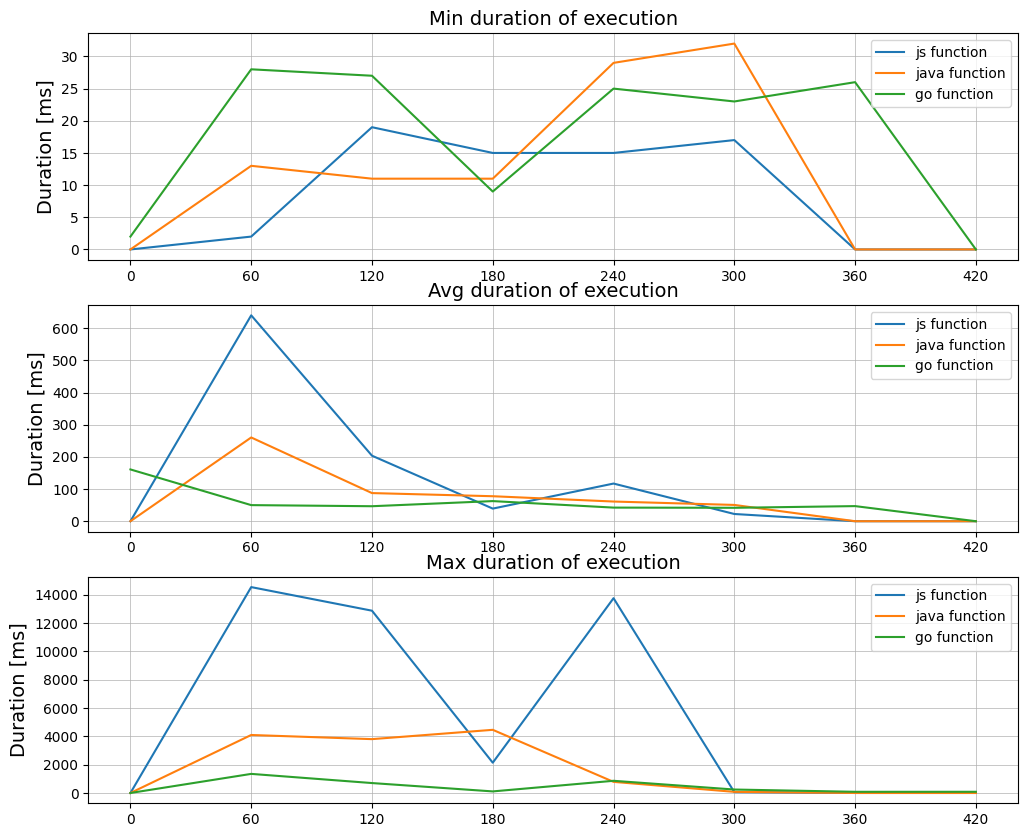

In [3]:
#plotting the durations

import matplotlib.pyplot as plt
import numpy as np

'''list1 = df_js_2.iloc[:,0].tolist()

list2 = []
for x in list1:
    #list2.append(x.split(" "))
    list2.append(str(x.time()))

#list3 = []
#for x in list2:
#    list3.append(x[-1])'''
list2 = [0, 60, 120, 180, 240, 300, 360, 420]
x = np.array(list2)

y = np.array (df_js_2.iloc[:, 1].tolist())
y_js_min = []
for item in y:
    y_js_min.append(float(item)*1000)
y = np.array (df_js_3.iloc[:, 1].tolist())
y_js_avg = [0]
for item in y:
    y_js_avg.append(float(item)*1000)
y_js_avg.append(0)
y_js_avg.append(0)
y = np.array (df_js_4.iloc[:, 1].tolist())
y_js_max = []
for item in y:
    y_js_max.append(float(item)*1000)



y = np.array (df_java_2.iloc[:, 1].tolist())
y_java_min = [0]
for item in y:
    y_java_min.append(float(item)*1000)
y_java_min.pop(-1)
y = np.array (df_java_3.iloc[:, 1].tolist())
y_java_avg = [0]
for item in y:
    y_java_avg.append(float(item)*1000)
y_java_avg.append(0)
y_java_avg.append(0)
y = np.array (df_java_4.iloc[:, 1].tolist())
y_java_max = [0]
for item in y:
    y_java_max.append(float(item)*1000)
y_java_max.pop(-1)



y = np.array (df_go_2.iloc[:, 1].tolist())
y_go_min = []
for item in y:
    y_go_min.append(float(item)*1000)
y_go_min.pop(0)
y = np.array (df_go_3.iloc[:, 1].tolist())
y_go_avg = []
for item in y:
    y_go_avg.append(float(item)*1000)
y_go_avg.append(0)
y = np.array (df_go_4.iloc[:, 1].tolist())
y_go_max = []
for item in y:
    y_go_max.append(float(item)*1000)
y_go_max.pop(-1)
y_go_max.pop(-1)


fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (12,10)) 
ax1.set_title("Min duration of execution", fontsize = 14)
#axis[0,0].set_xlabel('Time', fontsize = 14)
ax1.set_ylabel('Duration [ms]', fontsize = 14)

ax2.set_title("Avg duration of execution", fontsize = 14)
#axis[0,1].set_xlabel('Time', fontsize = 14)
ax2.set_ylabel('Duration [ms]', fontsize = 14)

ax3.set_title("Max duration of execution", fontsize = 14)
#axis[1,0].set_xlabel('Time', fontsize = 14)
ax3.set_ylabel('Duration [ms]', fontsize = 14)

ax1.plot(x, y_js_min, label = "js function")
ax2.plot(x, y_js_avg, label = "js function")
ax3.plot(x, y_js_max, label = "js function")
ax1.plot(x, y_java_min, label = "java function")
ax2.plot(x, y_java_avg, label = "java function")
ax3.plot(x, y_java_max, label = "java function")
ax1.plot(x, y_go_min, label = "go function")
ax2.plot(x, y_go_avg, label = "go function")
ax3.plot(x, y_go_max, label = "go function")
plt.rc('legend', fontsize = 10)
ax1.grid(True, linewidth=0.5)
ax2.grid(True, linewidth=0.5)
ax3.grid(True, linewidth=0.5)
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')
ax1.set_xticks(range(0,480,60))
ax2.set_xticks(range(0,480,60))
ax3.set_xticks(range(0,480,60))
plt.show()

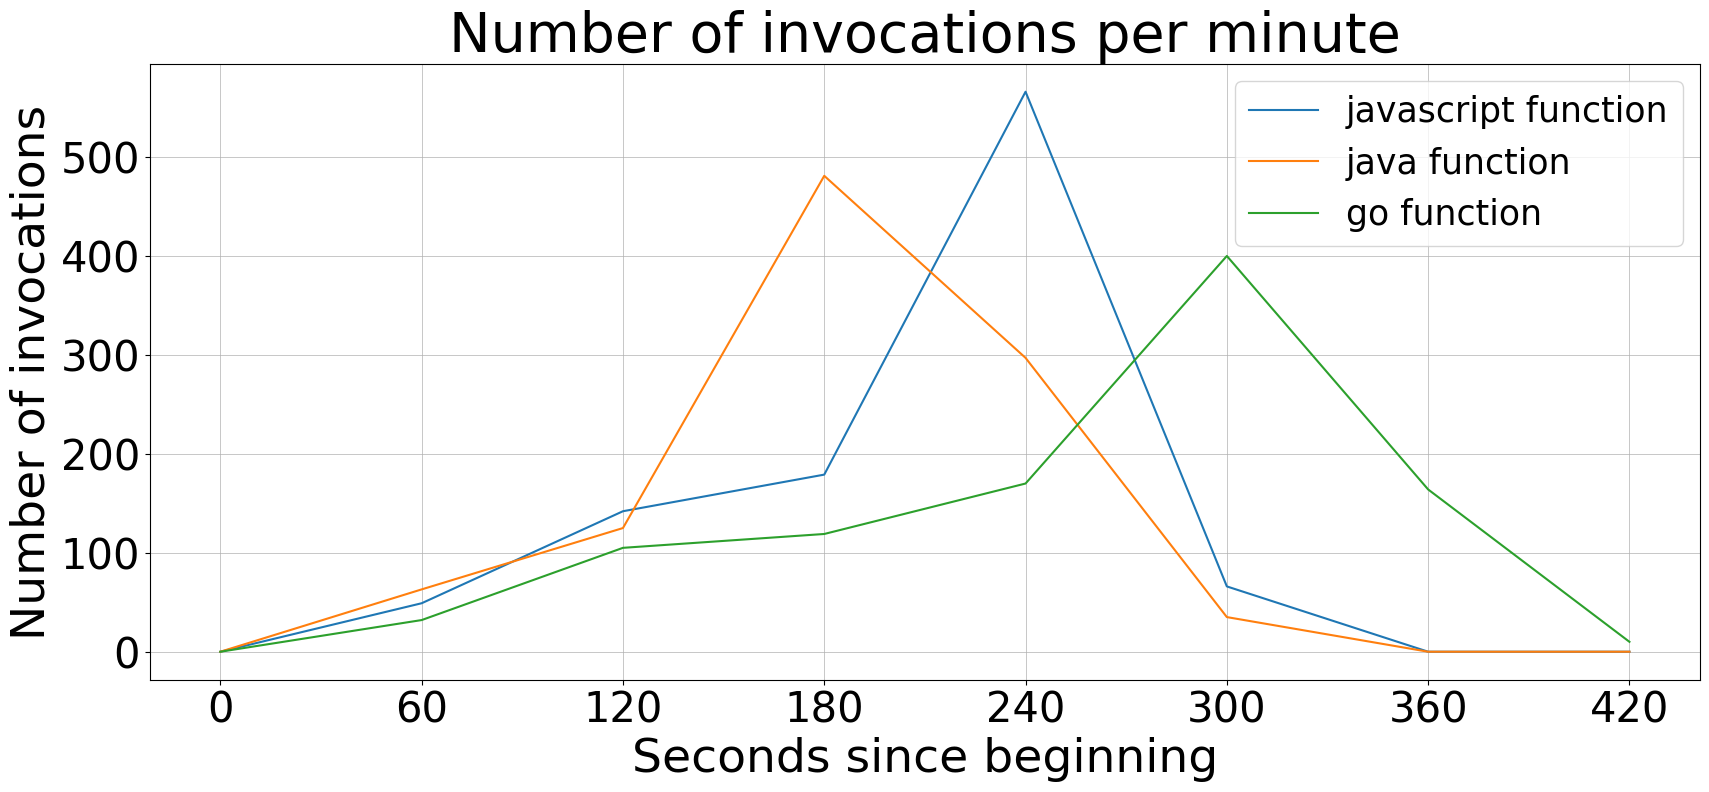

In [5]:
#plotting the invocations

import matplotlib.pyplot as plt
import numpy as np

'''list1 = df_js_1.iloc[:,0].tolist()

list2 = []
for x in list1:
    #list2.append(x.split(" "))
    list2.append(str(x.time()))'''
list2 = [0, 60, 120, 180, 240, 300, 360, 420]
x = np.array(list2)


y = np.array (df_js_1.iloc[:, 1].tolist())
invocations_js = []
for item in y:
    invocations_js.append(int(item))

y = np.array (df_java_1.iloc[:, 1].tolist())
invocations_java = [0]
for item in y:
    invocations_java.append(int(item))
invocations_java.pop(-1)

y = np.array (df_go_1.iloc[:, 1].tolist())
invocations_go = []
for item in y:
    invocations_go.append(int(item))
invocations_go.pop(-1)



fig, ax = plt.subplots(figsize = (20,8)) 
ax.set_title("Number of invocations per minute", fontsize = 40)
ax.set_xlabel('Seconds since beginning', fontsize = 34)
ax.set_ylabel('Number of invocations', fontsize = 34)
ax.plot( x, invocations_js, label = "javascript function")
ax.plot( x, invocations_java, label = "java function")
ax.plot(x, invocations_go, label = "go function")
plt.xticks(fontsize=30)
ax.set_xticks(range(0,480,60))
plt.yticks(fontsize=30)
plt.rc('legend', fontsize = 25)
plt.legend(loc = 'upper right')
ax.grid(True, linewidth=0.5)
plt.show()